In [1]:
## Poisson Equation
# Load  FEM Packages
from fenics import *
from mshr import *
# Plotting Libraries
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")
# Import NumPy
import numpy as np

In [2]:
# Classes for boundary conditions
class Interior(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary

class Left(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] > 250.0 - DOLFIN_EPS and on_boundary

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] < DOLFIN_EPS and on_boundary

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return x[1] <  -499.0 - DOLFIN_EPS and on_boundary
    
class Top(SubDomain):
    def inside(self, x, on_boundary):
        return x[1] > 0.0 - DOLFIN_EPS and on_boundary
    
# Plotting Function
def PlotFields(u_field, e_field):
    """
    PlotFields(u_field, e_field)
    """
    fig = plt.figure(figsize = (14,10))                       # Set the resolution
    plt.subplot(121)
    figU = plot(u_field)
    plt.colorbar(figU, shrink=0.5)
    plt.title("Potential Field")
    plt.subplot(122)
    figE = plot(e_field)
    plt.colorbar(figE, shrink = 0.5)
    plt.title("Electric Field")
    plt.show()

In [3]:
# Load Mesh
mesh = Mesh('snake_hole.xml')

# ## Plotting the solution.
# plt.figure(dpi=750)                       
# plot(mesh)
# plt.savefig("Pythonic_Mesh.png")              
# # plt.colorbar(plot(u)) 
# plt.show()

# Create mesh functions over the cell facets
sub_domains = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
# Mark all facets as sub domain 5
sub_domains.set_all(5)

interior = Interior()
left     = Left()
right    = Right()
bottom   = Bottom()
top      = Top()

interior.mark(sub_domains, 0)
left.mark(sub_domains, 1)
right.mark(sub_domains, 2)
bottom.mark(sub_domains, 3)
top.mark(sub_domains, 4)

In [4]:
# Define function space
V = FunctionSpace(mesh, 'P', 3)
# Boundary Conditions
bc0 = DirichletBC(V, Constant(2.0), sub_domains, 0)
bc1 = DirichletBC(V, Constant(0.0), sub_domains, 1)
bc2 = DirichletBC(V, Constant(0.0), sub_domains, 2)
bc3 = DirichletBC(V, Constant(0.0), sub_domains, 3)
bc4 = DirichletBC(V, Constant(0.0), sub_domains, 4)
bcs = [bc0, bc1, bc2, bc3, bc4]

In [5]:
# Declare variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)

# Solve problem
set_log_level(LogLevel.ERROR) # Suppress FEniCS output
solve(a == L, u, bcs)

In [6]:
# Save solution to file in VTK format
vtkfile = File('Pythonic/Pythonic_Potential.pvd')
vtkfile << u

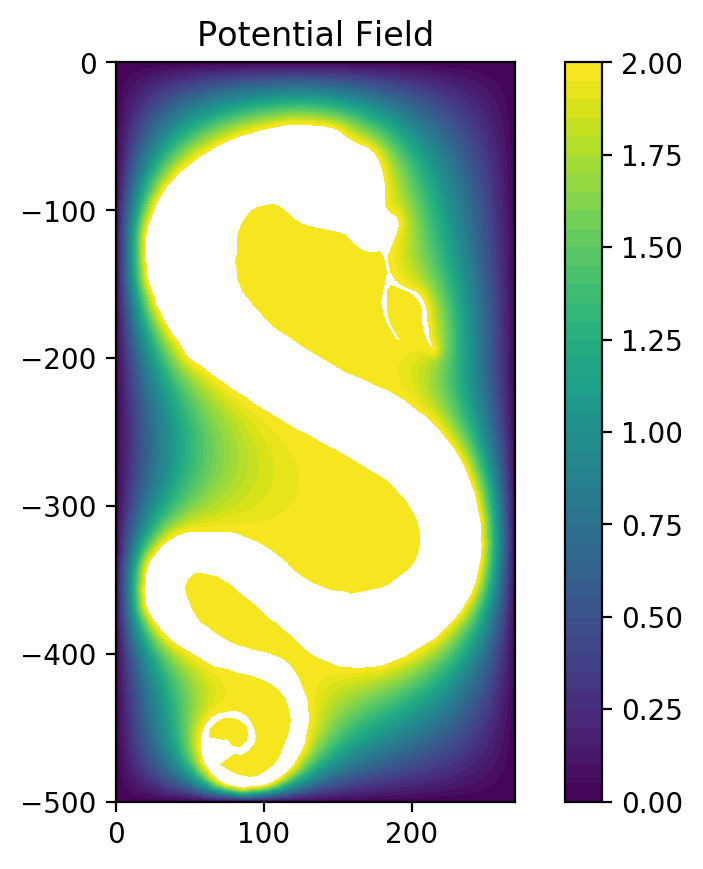

In [7]:
## Plotting the solution.
plt.figure(dpi=200)                       # Set the resolution
plot(u, title = 'Potential Field')        # Set the title
plt.colorbar(plot(u))                     # Add a colorbar
plt.savefig("Pythonic_Potential.png")     # Save the figure
plt.show()                                # Show the figure

Calling FFC just-in-time (JIT) compiler, this may take some time.


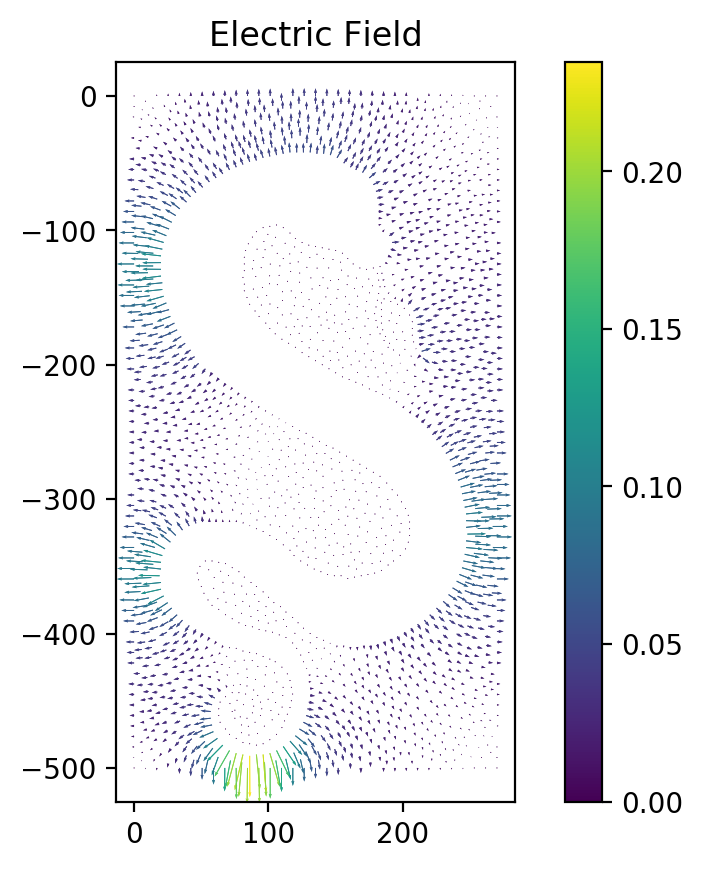

In [8]:
## Plotting the electric field.
e_field = - grad(u)                                    # Electric field
plt.figure(dpi=200)                                    # Set the resolution
plot(project(e_field), title = 'Electric Field')       # Set the title
plt.colorbar(plot(project(e_field)))                   # Add a colorbar
plt.savefig("Pythonic_ElectricField.png")              # Save the figure
plt.show()                                             # Show the figure

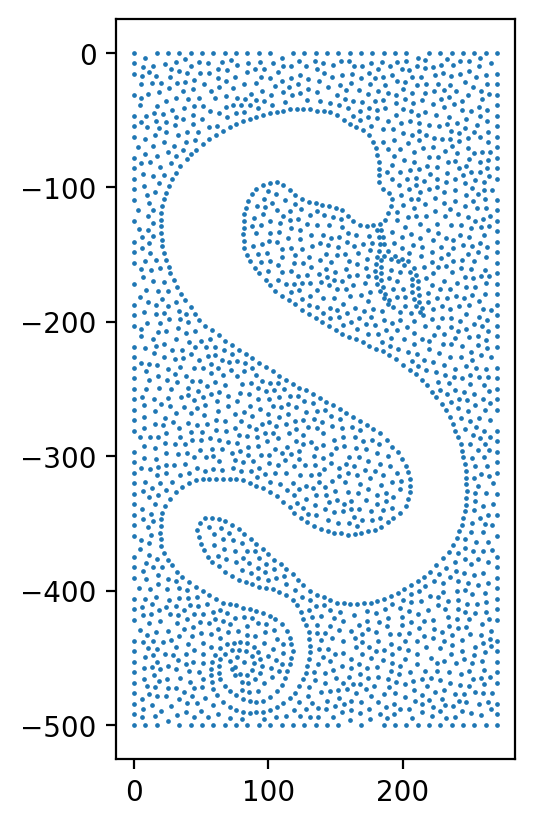

In [9]:
# Get Coordinates of the vertices in the Mesh
vertex_coordinates = mesh.coordinates()
x = vertex_coordinates[:,0]
y = vertex_coordinates[:,1]
# Save the coordinates in a csv file
np.savetxt("Pythonic.csv", vertex_coordinates, delimiter=",")

# Plot vertices of the mesh
fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
ax.scatter(x,y, s=0.5)
plt.savefig("Pythonic_Vertex    .png")
plt.show()